In [2]:
!pip install lifelines

    100% |████████████████████████████████| 215kB 561kB/s ta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from lifelines.datasets import load_waltons

In [4]:
df = load_waltons()
df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


In [5]:
T = df['T']
E = df['E']

In [11]:
E.unique()

array([1, 0])

In [12]:
df['group'].unique()

array(['miR-137', 'control'], dtype=object)

## Kaplan-Meier
### default function

In [6]:
# By defaultl, lifelines assums all deaths are observed.
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [8]:
%matplotlib inline

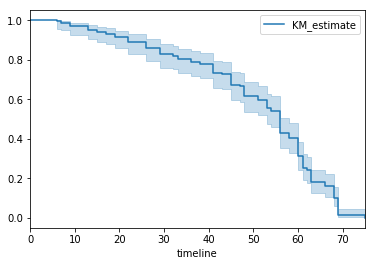

In [10]:
kmf.survival_function_
kmf.median_
kmf.plot()

### Multiple groups

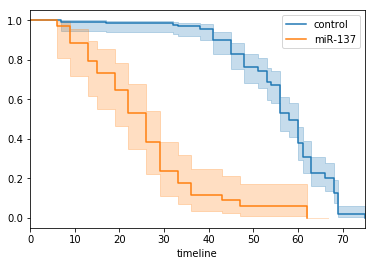

In [14]:
groups = df['group']
idx = (groups=='miR-137')
kmf.fit(T[~idx], E[~idx], label='control')
ax = kmf.plot()

kmf.fit(T[idx], E[idx], label='miR-137')
kmf.plot(ax=ax)

## Another Example with Kaplan-Meier

In [15]:
from lifelines.datasets import load_dd

In [16]:
# a dataset of politival regime
data = load_dd()

In [18]:
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 12 columns):
ctryname             1808 non-null object
cowcode2             1808 non-null int64
politycode           1801 non-null float64
un_region_name       1808 non-null object
un_continent_name    1808 non-null object
ehead                1808 non-null object
leaderspellreg       1808 non-null object
democracy            1808 non-null object
regime               1808 non-null object
start_year           1808 non-null int64
duration             1808 non-null int64
observed             1808 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 169.6+ KB


In [22]:
T = data['duration']
E = data['observed']

In [23]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

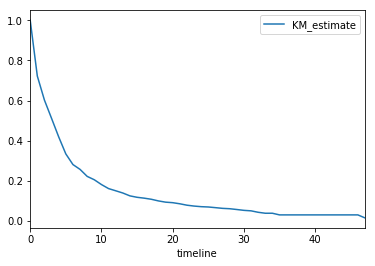

In [24]:
kmf.survival_function_.plot()

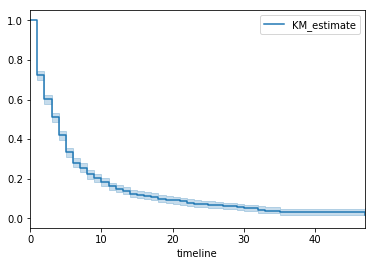

In [25]:
# plot its estimate and confidence intervals.
kmf.plot()

In [26]:
kmf.median_

4.0

### Weibull model

In [27]:
from lifelines import WeibullFitter

In [29]:
wf = WeibullFitter()
wf.fit(T, E)

<lifelines.WeibullFitter: fitted with 1808 observations, 340 censored>

In [30]:
wf.print_summary()

n=1808, number of events=1468

          coef  se(coef)  lower 0.95  upper 0.95
lambda_ 0.1637    0.0046      0.1546      0.1727
rho_    0.9426    0.0180      0.9074      0.9779


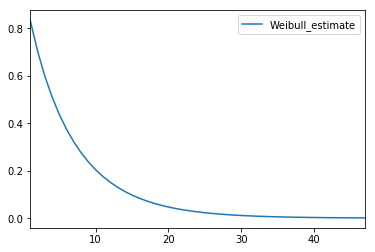

In [31]:
wf.survival_function_.plot()

In [32]:
wf.median_

4.1418822319450097

## Estimation in bank business

In [33]:
import pandas as pd

In [40]:
sex = ['F']*5 + ['M']*6

In [41]:
df_bank = pd.DataFrame({'T':[2,4,3,4,6,6,8,4,7,6,7], 
                       'E':[1,1,1,1,0,1,1,0,1,1,1], 
                       'Sex':sex})

In [43]:
df_bank.head()

,E,Sex,T
0,1,F,2
1,1,F,4
2,1,F,3
3,1,F,4
4,0,F,6


In [44]:
kmf = KaplanMeierFitter()

In [45]:
T = df_bank['T']
E = df_bank['E']

In [46]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 11 observations, 2 censored>

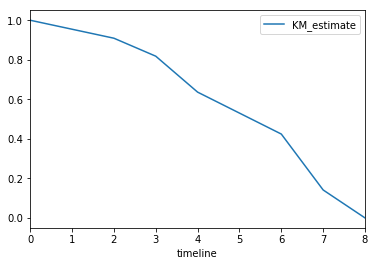

In [47]:
kmf.survival_function_.plot()

In [48]:
import numpy as np

In [49]:
np.random.randint(6)

0

In [52]:
np.random.randint(low = 3, high= 11, size = 50)

array([ 7,  8,  7,  4,  4,  9,  7,  5,  5,  6,  8, 10,  8,  8, 10, 10,  7,
        6,  7,  3,  6,  7,  6,  5,  9,  8, 10,  7,  7,  7,  8,  5,  3,  4,
        9,  9,  6, 10, 10,  4,  4,  4,  3,  3,  7,  8,  7, 10,  4,  8])

In [53]:
duration = np.random.randint(low = 3, high= 11, size = 50)

In [55]:
observation = np.random.randint(2, size=50)

In [56]:
observation

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1])

In [62]:
event_list = [1]*50

In [59]:
random_idx = np.random.randint(low=0, high=49, size=6)

In [60]:
random_idx

array([ 7, 10,  4, 18, 14, 38])

In [63]:
for i in random_idx:
    event_list[i] = 0

In [66]:
sex = ['M']*24 + ['F']*26

In [67]:
customers = pd.DataFrame({'T':duration, 
                          'E': event_list, 
                         'Sex':sex})

In [69]:
customers.head(10)

,E,Sex,T
0,1,M,5
1,1,M,10
2,1,M,9
3,1,M,8
4,0,M,5
5,1,M,3
6,1,M,9
7,0,M,4
8,1,M,7
9,1,M,6


In [70]:
T = customers['T']
E = customers['E']

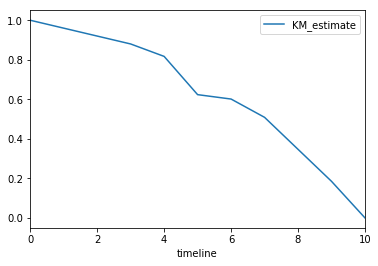

In [78]:
kmf.fit(T, event_observed=E)
kmf.survival_function_.plot();

In [79]:
kmf.median_

8.0

### compare the result with male and female

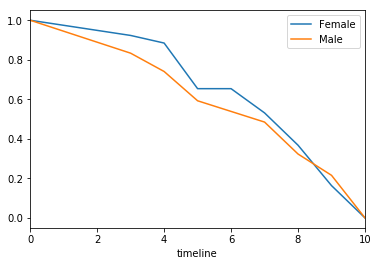

In [74]:
groups = customers['Sex']
idx = (groups=='M')
kmf.fit(T[~idx], E[~idx], label='Female')
ax = kmf.survival_function_.plot()

kmf.fit(T[idx], E[idx], label='Male')
kmf.survival_function_.plot(ax=ax)

### Use Weibull model

In [75]:
wf = WeibullFitter()
wf.fit(T, E)

<lifelines.WeibullFitter: fitted with 50 observations, 6 censored>

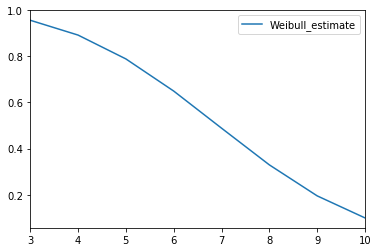

In [76]:
wf.survival_function_.plot()

In [77]:
wf.median_

6.9293205146656192